<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Jose-Bernardo-Moreno-Villarreal/blob/main/Ciencia_de_Datos_Semana_7_Tarea_Buena_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y Analítica de datos**
###Tecnológico de Monterrey
###Profr. Ma. de la Paz 

**A01794050 - José Bernardo Moreno Villarreal** 


In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from ipywidgets import interact, interactive, fixed, interact_manual


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
925,6.398273,27.613986
81,2.649751,52.882813
258,3.635282,47.945892
709,5.197884,35.190413
861,5.857551,25.338836
271,3.684825,47.565663
309,3.831470,38.023055
596,4.784456,39.061949
686,5.099577,31.788203
433,4.232913,41.046080


In [ ]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

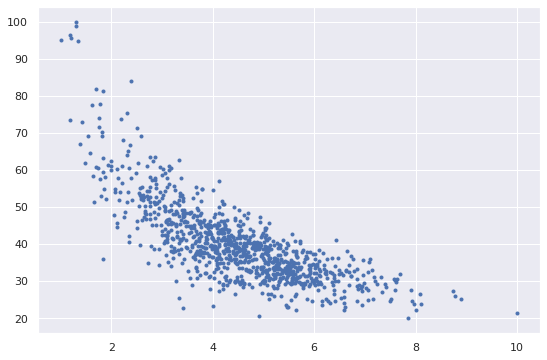

In [ ]:
plt.plot(X,y,'b.')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 800
Tamaño de X_train: (800, 1)
**************************************************
Mumero total de registros en el test dataset: 200
Tamaño del X_test: (200, 1)


In [ ]:
Performance_Summary, nombres =list(),list()

##Regresión lineal 

Modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [ ]:
def Plot_Graph (X,Y,X_fit,y_fit):
  sns.set(rc={'figure.figsize':(12,8)})
  plt.scatter(X,Y)
  plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
  plt.xlabel("$X$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.legend(loc="upper left", fontsize=14);
  
  

In [ ]:
def Plot_Linear_Predictor (X_train,y_train,X_test): 
  linear_reg = LinearRegression(fit_intercept=True)
  linear_reg.fit(X_train, y_train)

  #X_fit = np.linspace(0, 10, 100)
  X_fit = X_test
  y_fit = linear_reg.predict(X_fit)
  #print("Score:",linear_reg.score(y_train,y_fit))
  Plot_Graph(X_train, y_train, X_fit,y_fit)
  print("Modelo es y=",linear_reg.coef_,"X + ", linear_reg.intercept_)
  return y_fit 



Modelo es y= [-5.97912772] X +  66.79997932683362


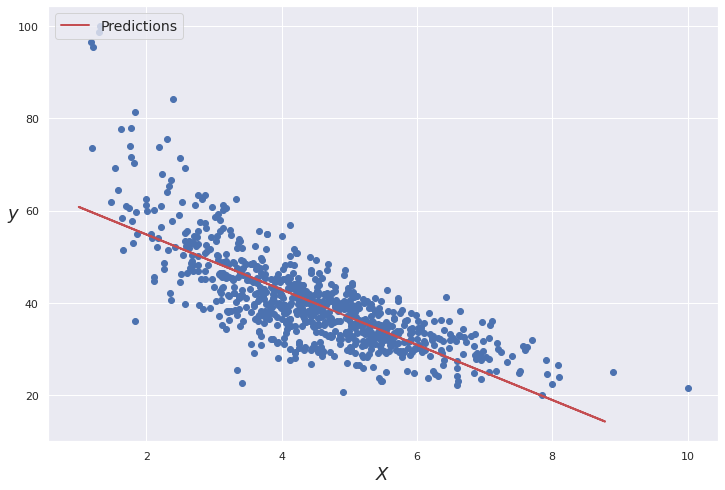

In [ ]:
y_fit=Plot_Linear_Predictor(X_train,y_train,X_test)

Ecuación del modelo:

$\hat{y} = -5.98X + 66.83$

In [ ]:

def Predictor_Performance (y_true,y_pred):
  MAE = metrics.mean_absolute_error(y_true, y_pred)
  RMSE= np.sqrt(metrics.mean_squared_error(y_true, y_pred))
  R2=r2_score (y_true, y_pred)

  print('MAE:  %.2f'%MAE)
  print('RMSE: %.2f'%RMSE)
  print('R2:  %.2f'%R2)
  return MAE,RMSE,R2

In [ ]:
Performance_Summary.append(Predictor_Performance(y_test,y_fit))
nombres.append("Lineal")

MAE:  5.03
RMSE: 7.07
R2:  0.60


##Regresión Polinominal 

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [ ]:
def Plot_Polinominal_Predictor (X_train, X_test,y_train,Degree):
  #Se determinan el grado de polinomio que queremos utilizar en nuestro modelo 
  poly_features = PolynomialFeatures(degree=Degree, include_bias=False)
  #Se guardan las X elevadas a la potencia del grado seleccionado. 
  X_poly = poly_features.fit_transform(X_train)
  #Se establece el modelo lineal
  lin_reg_poly = LinearRegression(fit_intercept=True)
  #Se corre el modelo respecto a las variables de interés
  lin_reg_poly.fit(X_poly, y_train)


  X_poly_test = poly_features.fit_transform(X_test)
  y_new = lin_reg_poly.predict(X_poly_test)
  
  order = np.argsort(X_test.values.ravel()) #Sacamos el ordende los datos
  sortedXPoly = X_test.values.ravel()[order] #Ordenamos los en un orden ordenado
  sortedYPoly = y_test.values.ravel()[order]
  sorted_predicPoly = y_new[order]


  Plot_Graph(X_train, y_train, sortedXPoly,sorted_predicPoly)
  print("\n Coeficientes:")
  print(lin_reg_poly.coef_, lin_reg_poly.intercept_)
  return y_new


 Coeficientes:
[-5.25423068e+01  1.16873335e+01 -1.22483592e+00  4.76367627e-02] 129.7913147686142


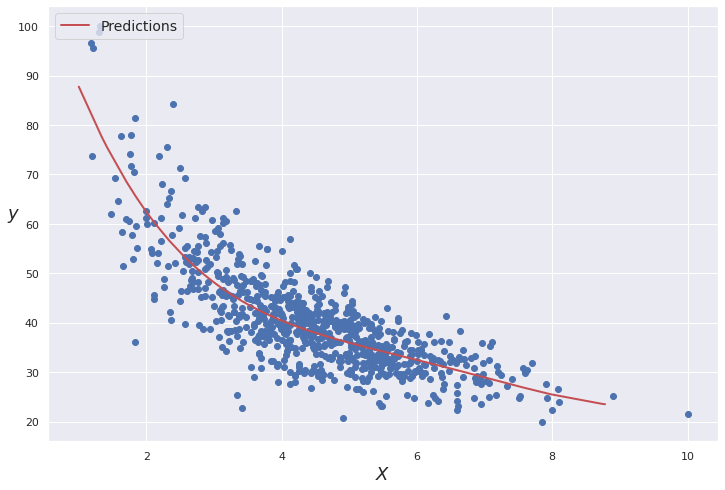

In [ ]:
y_fit_Poli= Plot_Polinominal_Predictor(X_train,X_test,y_train,4)

Ecuación del modelo:

$\hat{y} = -52.5X^4 +11.68X^3-1.22X^2+0.047X+129.79$

In [ ]:
Performance_Summary.append(Predictor_Performance(y_test,y_fit_Poli))
nombres.append("Polinomial")

MAE:  4.35
RMSE: 5.55
R2:  0.75


##Regresión Ridge

In [ ]:
def Plot_Ridge_Predictor (X_train, y_train,X_test,Degree,alpha_value):
  model_ridge = Pipeline(steps=[("PolyFeatures",PolynomialFeatures(degree=Degree, include_bias=False)),
                              ('escalar',StandardScaler()),
                              ('ridge',Ridge(alpha =alpha_value, solver ="cholesky", random_state=1))])
  model_ridge.fit(X_train,y_train)
  X_new=np.linspace(0, 10, 100).reshape(100, 1)
  y_fit_plot=model_ridge.predict(X_new)
  y_fit=model_ridge.predict(X_test)
  Plot_Graph(X_train, y_train,X_new,y_fit_plot)
  return y_fit


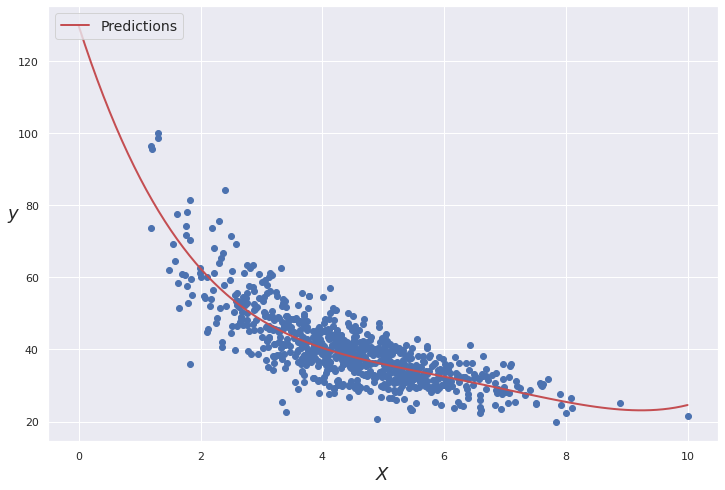

In [ ]:
y_pred_Ridge=Plot_Ridge_Predictor(X_train,y_train,X_test,4,.0001)

Ecuación del modelo:

$\hat{y} = -52.5X^4 +11.68X^3-1.22X^2+0.047X+129.79$

In [ ]:
Performance_Summary.append(Predictor_Performance(y_test,y_pred_Ridge))
nombres.append("Ridge")

MAE:  4.35
RMSE: 5.55
R2:  0.75


##Regresión Lasso 

In [ ]:
def Plot_Lasso_Predictor (X_train, y_train,X_test,Degree,alpha_value):
  model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=Degree, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = alpha_value, random_state = 1))])
  model_lasso.fit(X_train, y_train)
  X_new=np.linspace(0, 10, 100).reshape(100, 1)
  y_fit_plot=model_lasso.predict(X_new)
  y_fit=model_lasso.predict(X_test)
  Plot_Graph(X_train, y_train,X_new,y_fit_plot)
  return y_fit

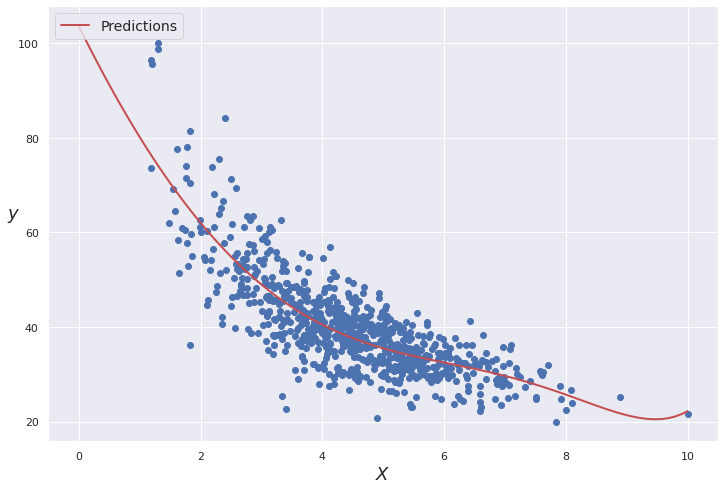

In [ ]:
y_pred_lasso=Plot_Lasso_Predictor(X_train,y_train,X_test,13,0.001)

In [ ]:
nombres.append("Lasso")
Performance_Summary.append(Predictor_Performance(y_test,y_pred_lasso))

MAE:  4.37
RMSE: 5.69
R2:  0.74


##Finalmente gráfica :

* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)

In [ ]:
for i in range (4): 
  print("\n",nombres[i])
  print("MAE: %.2f \tRMSE: %.2f \tR2: %.2f" % Performance_Summary[i])


 Lineal
MAE: 5.03 	RMSE: 7.07 	R2: 0.60

 Polinomial
MAE: 4.35 	RMSE: 5.55 	R2: 0.75

 Ridge
MAE: 4.35 	RMSE: 5.55 	R2: 0.75

 Lasso
MAE: 4.37 	RMSE: 5.69 	R2: 0.74


In [ ]:
def plotError (num,nombre):
  #0 ---> MAE 
  #1 ---> RMSE
  #2 ---> R2
  Error_list=list()
  for k in range (4):
     Error_list.append(Performance_Summary[k][num])
  plt.bar(nombres,Error_list)
  plt.xlabel("Regresión")
  plt.ylabel(nombre)

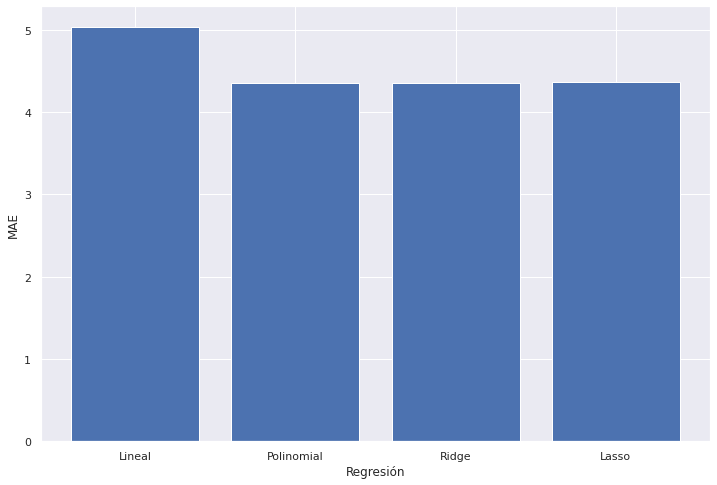

In [ ]:
plotError(0,"MAE")

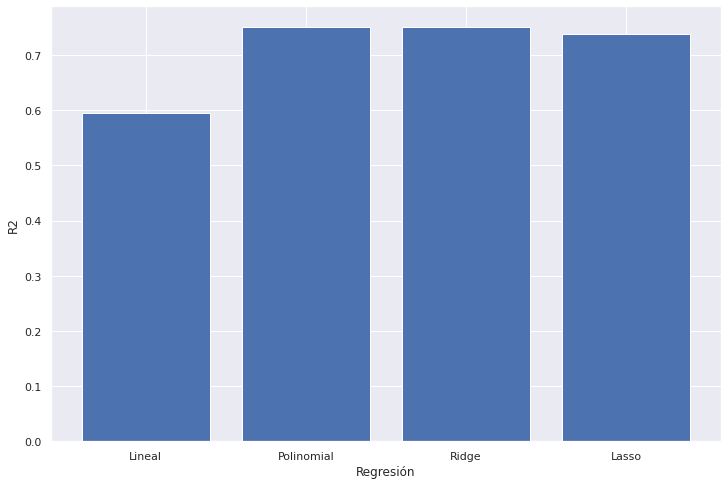

In [ ]:
plotError(2,"R2")

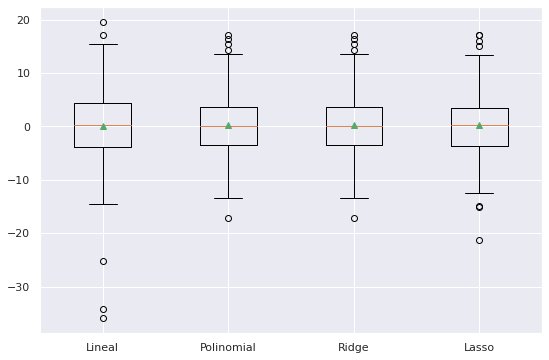

In [ ]:
residuo_regresion_simple=y_fit - y_test
residuo_regresion_poliforme= y_fit_Poli - y_test
residuo_ridge=y_pred_Ridge - y_test
residuo_lasso=y_pred_lasso - y_test
lista_residuos= [residuo_regresion_simple,residuo_regresion_poliforme,residuo_ridge,residuo_lasso]
nombres=list()
nombres.append('Lineal')
nombres.append('Polinomial')
nombres.append('Ridge')
nombres.append('Lasso')

#grafica del MAE (de los cuatro métodos)
sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(lista_residuos, labels=nombres, showmeans=True)
plt.show()

##Explica tus resultados




* **¿Qué método conviene más a la empresa?¿por qué?**
Considero que a la empresa le conviene utilizar una función polinomial de 4to orden con Ridge debido a que para este modelo obtuvimos un R2 de 0.75, es decir que el modelo puede predecir correctamente. 

* **Qué porcentajes de entrenamiento y evaluación usaste?**
Utilicé 80% de datos de entrenamiento y 20% de validación. 

* **¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?**
Se obtuvo un error de 4.35%, es un error aceptable debajo del 5%, lo sabemos al probar el modelo y plotear los residuales. 



#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13256,1954700410,20140801T000000,2546000.0,4,3.00,4190,8805,2.5,0,2,...,9,3490,700,1928,0,98112,47.6181,-122.284,3780,8558
9034,2228900191,20150106T000000,340000.0,3,1.75,1740,10800,1.0,0,0,...,7,1740,0,1959,0,98133,47.7717,-122.351,1810,7735
19370,3353401340,20150216T000000,199900.0,4,1.75,1790,12000,1.0,0,0,...,6,1790,0,1944,0,98001,47.2664,-122.256,1550,9840
3734,1828300100,20150330T000000,800000.0,4,2.50,3100,7807,2.0,0,0,...,9,3100,0,2003,0,98034,47.7151,-122.227,3100,7807
8501,4019300155,20140821T000000,911100.0,4,3.25,3330,33826,2.0,0,0,...,8,3330,0,1924,0,98155,47.7596,-122.275,2580,28707
10749,3317500070,20150408T000000,1135000.0,4,2.75,3840,10004,1.0,0,2,...,9,2110,1730,1963,0,98040,47.5606,-122.225,3500,12118
21514,3262300818,20150227T000000,1865000.0,4,3.75,3790,8797,2.0,0,0,...,11,3290,500,2006,0,98039,47.6351,-122.236,2660,12150
21414,1624049291,20141008T000000,557500.0,3,3.50,3350,5025,2.0,0,2,...,8,2670,680,2014,0,98144,47.5699,-122.296,2030,5117
20790,3845101070,20150428T000000,425996.0,4,2.50,2568,5000,2.0,0,0,...,9,2568,0,2014,0,98092,47.2596,-122.194,2547,4500
7410,1591600307,20150511T000000,360000.0,3,1.75,1810,7200,1.0,0,0,...,7,1030,780,1959,0,98146,47.4993,-122.364,1950,8384


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

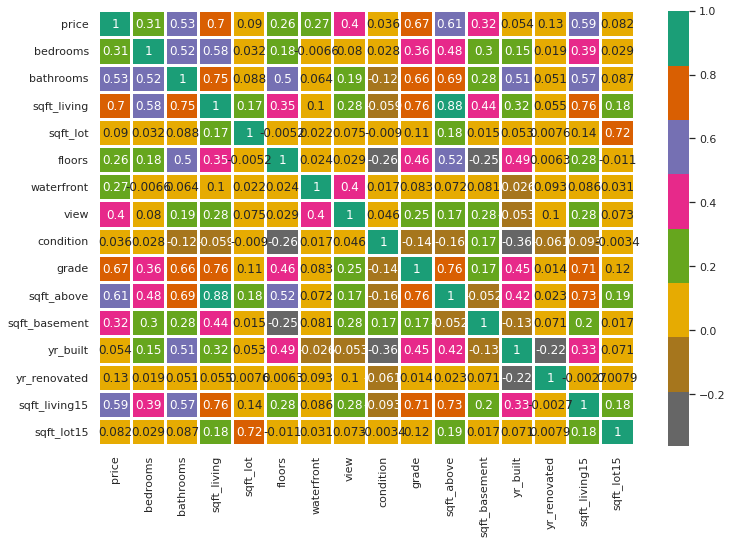

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 10)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train2)}')
print(f'Tamaño de X_train: {X_train2.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test2)}')
print(f'Tamaño del X_test: {X_test2.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


In [ ]:
metricas = {
    "R2":"r2",
    "MAE":'neg_mean_absolute_error'}

resultados = list()

##Regresión Lineal

In [ ]:
from sklearn.model_selection import train_test_split,cross_validate,RepeatedKFold
#Se realiza validación cruzada para todas las columnas. 
LRM = LinearRegression(fit_intercept=True)
#Se realizan 5 subset y se realiza 3 repeticiones. 
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
#Se obtiene el promedio del error de la metrica R2 y MAE
scores = cross_validate(LRM,X_train2,y_train2,scoring=metricas,cv=kfold)
#Se obtienen los resultados y se guardan en una lista. 
resultados.append(scores)
#Se corre el modelo 
LRM.fit(X_train2,y_train2)
#Se predicen los valores. 
y_fit2 = LRM.predict(X_test2)
# Se obtienen los valores
print(LRM.coef_.ravel(), LRM.intercept_)

[-3.76683274e+04  4.27364791e+04  1.02300342e+02 -7.69755024e-02
  2.31889484e+04  5.51599951e+05  4.41166108e+04  2.09451037e+04
  1.24305790e+05  4.91681504e+01  5.31321920e+01 -3.46978539e+03
  4.68331247e+00  2.99056709e+01 -4.58858771e-01] [5972932.92018314]


Ecuación del modelo:

$\hat{y} =-3.76𝑋1 + 4.27𝑋2 + 1.02X3 - 7.69X4 + 2.31X5 + 5.51X6 + 4.41X7 + 2.09X8 + 1.24 X9 + 4.91X10 + 5.31X11 - 3.46X12 + 4.68X13 + 2.99X14 - 4.58X15 + 5972932.92$

## Regresión Múltiple

In [ ]:
#Se obtienen los valores polinomiales
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#Se transforma la X )
X_poly = poly_features.fit_transform(X_train2)
#Se aplica la regresion multiple
poly_lr = LinearRegression(fit_intercept=True)
#Se realiza la validacion cruzada con 5 lapsos 
kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(poly_lr ,X_train2,y_train2,scoring=metricas,cv=kfold)
#Se guardan lps resultados en la lista previamente definida para los scores de validación 
resultados.append(scores)
poly_lr.fit(X_poly,y_train2)
#Se corre el modelo. 
X_poly_transform = poly_features.transform(X_test2)
y_fit_poly = poly_lr.predict(X_poly_transform)

In [ ]:
#Se obtienen los valores de los coeficientes. 
print(poly_lr.coef_.ravel(), poly_lr.intercept_)

[ 1.08105215e+06 -1.02221957e+06 -1.01827869e+03 -3.63059434e+01
 -2.11606976e+06 -3.98422047e+06 -3.12993867e+05  5.30011189e+05
  1.27469467e+06 -4.95704771e+02 -2.67320857e+02 -7.27527747e+04
 -3.38519349e+03  4.03130255e+03 -2.14745422e+01  8.62578909e+02
  3.73270565e+03 -1.43758738e+01  2.50428132e-01  1.70733704e+04
 -1.39743510e+03  3.00863534e+02 -2.44882404e+03 -2.93344801e+03
 -3.73308824e+00 -1.23352901e+01 -5.58205558e+02 -6.70675743e+00
  1.85973107e+01  6.09189442e-02 -1.11567570e+04  1.93913879e+01
 -5.52683965e-01 -2.10724190e+04  6.55085208e+04  2.66266651e+03
 -4.00515058e+03  1.46476016e+04  1.00098064e+01  9.77850349e+00
  5.04864921e+02 -2.11325574e+01 -1.69104967e+01  4.61692289e-01
  1.51860305e+00  1.07165989e+01 -1.70106330e+01  8.40224936e+01
 -5.97597995e+00  8.29189236e+00  2.72373361e+01 -7.26580676e-01
 -1.52941126e+00  1.44429615e+00 -2.06890608e-02  1.18726349e+00
  2.57006355e+00  9.03150067e-07  3.23923293e-01  1.39536242e-01
  1.22170938e-02  4.12774

In [ ]:
#Se identifica el orden de la regresión 
order = np.argsort(X_test2.values.ravel())
x_order = X_test2.values.ravel()[order]
y_order = y_test2.values.ravel()
#Se corre el modelo 
y_fit_order =y_fit_poly

In [ ]:
Performance_Summary.append(Predictor_Performance(y_order,y_fit_order))

MAE:  124347.09
RMSE: 192576.30
R2:  0.75


##Regresión Ridge

In [ ]:
modelo_ridge = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=10, solver='cholesky', random_state=10))
])

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(modelo_ridge ,X_train2,y_train2,scoring=metricas,cv=kfold)
resultados.append(scores)

modelo_ridge.fit(X_train2, y_train2)

y_fit_ridge = modelo_ridge.predict(X_test2)

In [ ]:
# OBTENEMOS LOS VALORES 
modelo_ridge['ridge'].coef_, modelo_ridge['ridge'].intercept_

(array([[ 6.45140493e+04,  1.55918051e+04, -4.54028008e+03,
         -1.00986686e+05, -2.87695912e+04, -3.04488078e+04,
         -2.72195569e+04,  4.05170888e+04,  7.56899691e+04,
         -7.26739443e+03,  4.15711442e+03, -8.45994981e+04,
         -6.06046444e+04,  1.19363837e+05,  8.57535605e+03,
          9.10411467e+03, -2.10103461e+04, -3.53641536e+04,
          1.56200114e+04,  2.93588922e+04,  2.20175399e+02,
          2.72639524e+03,  1.20266618e+04, -7.05723490e+03,
         -3.08953613e+04, -2.32151915e+04, -9.30339840e+04,
          5.22488749e+03,  5.46067304e+04,  7.67131077e+03,
         -1.18853463e+04,  5.82843863e+04, -4.40513775e+04,
         -3.19154020e+04,  2.24595376e+04,  6.10477606e+03,
         -4.70221202e+04,  8.59886755e+04,  6.31200092e+04,
          1.30296480e+04,  2.65226234e+04, -2.58782694e+04,
         -8.15253955e+04,  3.45430069e+04,  1.78988071e+04,
         -3.94909818e+04, -4.30326157e+04,  1.81789510e+04,
         -4.60937345e+03,  7.46661203e+0

In [ ]:
order = np.argsort(X_test2.values.ravel())
x_order = X_test2.values.ravel()[order]
y_order = y_test2.values.ravel()
y_fit_order = y_fit_ridge

In [ ]:
Performance_Summary.append(Predictor_Performance(y_order,y_fit_order))

MAE:  125878.18
RMSE: 195200.02
R2:  0.74


##Regresión Lasso

In [ ]:
import warnings
warnings.filterwarnings("ignore")

modelo_lasso = Pipeline([
    ('poli_features',PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=10, random_state=10))
])

kfold = RepeatedKFold(n_splits=5, n_repeats=3)
scores = cross_validate(modelo_lasso ,X_train2,y_train2,scoring=metricas,cv=kfold)
resultados.append(scores)

modelo_lasso.fit(X_train2, y_train2)

y_fit_lasso = modelo_lasso.predict(X_test2)

In [ ]:
# OBTENEMOS LOS VALORES 
modelo_lasso['lasso'].coef_, modelo_lasso['lasso'].intercept_

(array([ 7.95035403e+04,  1.09774008e+05,  5.12981975e+04, -1.05654280e+05,
        -3.91595478e+04, -9.05914599e+02,  5.45333588e+04,  4.21201912e+04,
         2.17270247e+05, -1.19543136e+05, -3.66437725e+04, -9.35689622e+04,
        -9.74112859e+04,  6.39187860e+04, -1.57438800e+03,  9.53195592e+03,
        -2.08927097e+04, -6.74373245e+04,  1.73627853e+04,  3.24343520e+04,
        -1.74795673e+02,  2.07674365e+03,  9.76558272e+03, -1.28479549e+04,
        -1.31642157e+04, -1.18333597e+04, -1.05235794e+05,  5.92832985e+03,
         6.51688110e+04,  6.97864499e+03, -1.22375300e+04,  1.51834147e+05,
        -4.76653248e+04, -3.65057309e+04,  2.25640621e+04,  8.38269018e+03,
        -5.17904934e+04,  1.16739761e+05, -8.41587532e+03, -1.72515956e+04,
        -7.50290604e+04, -2.75778168e+04, -1.07097666e+05,  3.86767002e+04,
         6.63336846e+04, -1.22379873e+04, -2.93927188e+04, -4.84548216e+03,
         7.50210842e+04, -2.61083172e+04,  2.68641243e+05, -2.29899993e+05,
        -3.3

In [ ]:
order = np.argsort(X_test2.values.ravel())
x_order = X_test2.values.ravel()[order]
y_order = y_test2.values.ravel()
y_fit_order = y_fit_lasso

In [ ]:
Performance_Summary.append(Predictor_Performance(y_order,y_fit_order))

MAE:  125894.58
RMSE: 195668.14
R2:  0.74


##Visualización de las gráficas

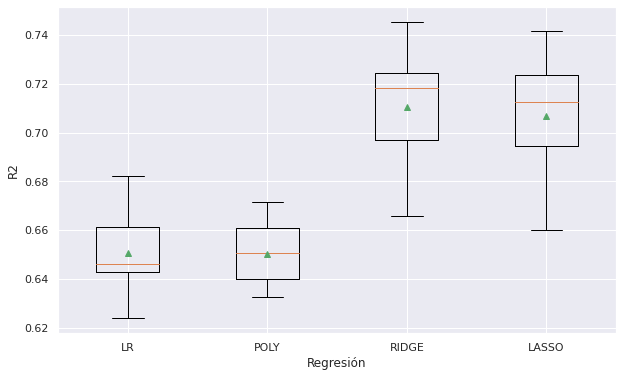

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})

R2list = list()
for i in range(len(resultados[0])):
  r2 = resultados[i]['test_R2']
  R2list.append(r2)

plt.boxplot(R2list, labels=['LR','POLY','RIDGE','LASSO'],showmeans=True)
plt.xlabel("Regresión")
plt.ylabel("R2")
plt.show()

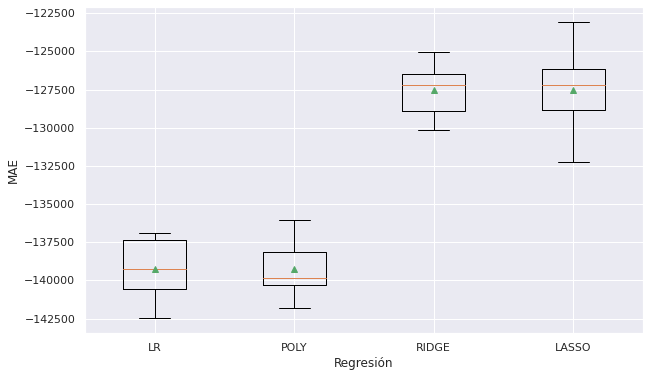

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})

MAElist = list()
for i in range(len(resultados[0])):
  mae = resultados[i]['test_MAE']
  MAElist.append(mae)

plt.boxplot(MAElist, labels=['LR','POLY','RIDGE','LASSO'],showmeans=True)
plt.xlabel("Regresión")
plt.ylabel("MAE")
plt.show() 

##Explica tus resultados


* **¿Qué método se aproxima mejor, ¿por qué?**
Se observa que el que mejor se aproxima es Ridge, tambien se observa que es el que tiene menor varianza en su error. 

* **¿Qué porcentajes de entrenamiento y evaluación usaste?**
Se utilizaron 80% de los datos para entrenamiento y 20% para validación 

* **¿Qué error tienes?, ¿es bueno?, ¿Cómo lo sabes?**

Error promedio de 127500, es un error malo ya que aunque el modelo se ajusta correctamente, al probar el modelo con los datos de prueba se observa un error superior al utilizar otras métricas. 


##Conclusiones


La regresión nos permite crear un modelo que nos ayude a predecir valores. Al incrementar la complejidad del modelo, es decir al incrementar el grado del polinomio, podemos predecir mejor el modelo, sin embargo hay que tener cuidado de no crear un modelo sobre entrenado en el cual tengamos buenos datos de predicción del modelo pero que no sea capaz de predecir sus valores al probarlos en la realidad. Los restrictores de Lasso y Ridge nos ayudan a evitar esto al penalizar los coeficientes de mayor orden. 

En la actividad de se observó esto de manera gráfica, en el cual los modelos Ridge y Lasso nos permiten tener un modelo correcto sin que esté sobreentrenado. 